# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

df = pd.read_csv('real_estate_data.csv', sep='\t')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Пропуски присутствуют в следующих столбцах: 

"ceiling_height" - высота потолков (м), 

"floors_total" - всего этажей в доме, 

"living_area" - жилая площадь в квадратных метрах(м²), 

"is_apartment" - апартаменты (булев тип), 

"kitchen_area" - площадь кухни в квадратных метрах (м²),

"balcony" - число балконов, 

"locality_name" - название населённого пункта, 

"airports_nearest" - расстояние до ближайшего аэропорта в метрах (м), 

"cityCenters_nearest" - расстояние до центра города (м), 

"parks_around3000" - число парков в радиусе 3 км, 

"ponds_nearest" - расстояние до ближайшего водоёма (м), 

"days_exposition" - сколько дней было размещено объявление (от публикации до снятия). 

### Шаг 2. Предобработка данных

Более подробно рассчитаем количество пропусков по каждому столбцу и разобьем их на 2 группы. 1ая - с относительно небольшим количеством пропусков; 2ая - с большим количеством пропусков.

In [2]:
#Рассчитаем количество пропусков в столбцах с относительно небольшим количеством пропусков.
floors_total_null        = df[df['floors_total'].isnull()]['total_images'].count()
living_area_null         = df[df['living_area'].isnull()]['total_images'].count()
kitchen_area_null        = df[df['kitchen_area'].isnull()]['total_images'].count()
airports_nearest_null    = df[df['airports_nearest'].isnull()]['total_images'].count()
cityCenters_nearest_null = df[df['cityCenters_nearest'].isnull()]['total_images'].count()
parks_around3000_null    = df[df['parks_around3000'].isnull()]['total_images'].count()
ponds_around3000_null    = df[df['ponds_around3000'].isnull()]['total_images'].count()
days_exposition_null     = df[df['days_exposition'].isnull()]['total_images'].count()
locality_name_null       = df[df['locality_name'].isnull()]['total_images'].count()
#Распечатаем значения.
print('Столбцы с относительно небольшим количеством пропусков:')
print('"floors_total":        ' + str(floors_total_null))
print('"living_area":         ' + str(living_area_null))
print('"kitchen_area":        ' + str(kitchen_area_null))
print('"airports_nearest":    ' + str(airports_nearest_null))
print('"cityCenters_nearest": ' + str(cityCenters_nearest_null))
print('"parks_around3000":    ' + str(parks_around3000_null))
print('"ponds_around3000":    ' + str(ponds_around3000_null))
print('"days_exposition":     ' + str(days_exposition_null))
print('"locality_name":       ' + str(locality_name_null))
print()

#Теперь рассчитаем количество пропусков в столбцах с большим количеством пропусков.
parks_nearest_null  = df[df['parks_nearest'].isnull()]['total_images'].count()
ponds_nearest_null  = df[df['ponds_nearest'].isnull()]['total_images'].count()
ceiling_height_null = df[df['ceiling_height'].isnull()]['total_images'].count()
balcony_null        = df[df['balcony'].isnull()]['total_images'].count()
#Очень много пропусков
is_apartment_null   = df[df['is_apartment'].isnull()]['total_images'].count()
#Распечатаем результаты
print('Столбцы с большим количеством пропусков:')
print('"parks_nearest":       ' + str(parks_nearest_null))
print('"ponds_nearest":       ' + str(ponds_nearest_null))
print('"ceiling_height":      ' + str(ceiling_height_null))
print('"balcony":             ' + str(balcony_null))
print('"is_apartment":        ' + str(is_apartment_null))

Столбцы с относительно небольшим количеством пропусков:
"floors_total":        86
"living_area":         1903
"kitchen_area":        2278
"airports_nearest":    5542
"cityCenters_nearest": 5519
"parks_around3000":    5518
"ponds_around3000":    5518
"days_exposition":     3181
"locality_name":       49

Столбцы с большим количеством пропусков:
"parks_nearest":       15620
"ponds_nearest":       14589
"ceiling_height":      9195
"balcony":             11519
"is_apartment":        20924


Пропуски в первой группе столбцов заменим на характерное значение (медиану) соответствующего столбца.

Небольшое количество пропусков в столбце с категориальными значениями ("locality_name") заменим на "Не указано".

Столбцы "parks_nearest", "ponds_nearest", "ceiling_height" не являются самыми важными и к тому же расстояния до определенных объектов понятие растяжимое, соответственно их тоже можно заменить на характерное значение соответствующего столбца(медиану).

Столбец "is_apartment" пока что оставим без изменения.

Все пропуски в столбцах, которые хранят расстояния до парков, прудов, аэропортов и.т.д вероятнее всего обусловлены тем, что поблизости их нет, но для большей правдоподобности заменим эти пропуски на среднее по населенному пункту.

In [3]:
df["floors_total"].fillna(df['floors_total'].median(), inplace=True)
df["living_area"].fillna(df['living_area'].median(), inplace=True)
df["cityCenters_nearest"].fillna(df['cityCenters_nearest'].median(), inplace=True)
df["locality_name"].fillna("Не указано", inplace=True)
df["balcony"].fillna(0, inplace=True)

kitchen_coef = (df['kitchen_area'] / df['total_area']).mean()
df['kitchen_area']         = df['kitchen_area'].fillna(value=df['total_area'] * kitchen_coef)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [4]:
#Создаем словари по каждому параметру
avg_airport_per_location  = df.groupby('locality_name')['airports_nearest'].median().to_dict()
avg_park_per_location     = df.groupby('locality_name')['parks_nearest'].median().to_dict()
avg_pond_per_location     = df.groupby('locality_name')['ponds_nearest'].median().to_dict()
avg_park3000_per_location = df.groupby('locality_name')['parks_around3000'].median().to_dict()
avg_pond3000_per_location = df.groupby('locality_name')['ponds_around3000'].median().to_dict()
avg_ceiling_per_location  = df.groupby('locality_name')['ceiling_height'].median().to_dict()

#Заменяем все пропуски на -1 в каждом столбце
df["ceiling_height"].fillna(-1, inplace=True)
df["airports_nearest"].fillna(-1, inplace=True)
df["parks_nearest"].fillna(-1, inplace=True)
df["ponds_nearest"].fillna(-1, inplace=True)
df["parks_around3000"].fillna(-1, inplace=True)
df["ponds_around3000"].fillna(-1, inplace=True)

#Функция для заполнения высоты потолка
def mapper1(row):
    if row["ceiling_height"] == -1:
        return avg_ceiling_per_location[row['locality_name']]
    return row["ceiling_height"]

#Функция для заполнения расстояния до ближайшего аэропорта
def mapper2(row):
    if row["airports_nearest"] == -1:
        return avg_airport_per_location[row['locality_name']]
    return row["airports_nearest"]

#Функция для заполнения расстояния до ближайшего парка
def mapper3(row):
    if row["parks_nearest"] == -1:
        return avg_park_per_location[row['locality_name']]
    return row["parks_nearest"]

#Функция для заполнения расстояния до ближайшего пруда
def mapper4(row):
    if row["ponds_nearest"] == -1:
        return avg_pond_per_location[row['locality_name']]
    return row["ponds_nearest"]

#Функция для заполнения количества парков в радиусе 3км
def mapper5(row):
    if row["parks_around3000"] == -1:
        return avg_park3000_per_location[row['locality_name']]
    return row["parks_around3000"]

#Функция для заполнения количества прудов в радиусе 3км
def mapper6(row):
    if row["ponds_around3000"] == -1:
        return avg_pond3000_per_location[row['locality_name']]
    return row["ponds_around3000"]

#Непосредственное заполнения
df["ceiling_height"]   = df.apply(mapper1, axis=1)
df["airports_nearest"] = df.apply(mapper2, axis=1)
df["parks_nearest"]    = df.apply(mapper3, axis=1)
df["ponds_nearest"]    = df.apply(mapper4, axis=1)
df["parks_around3000"] = df.apply(mapper5, axis=1)
df["ponds_around3000"] = df.apply(mapper6, axis=1)

In [5]:
#Разберемся по подробнее с пропусками из столбца "is_apartment"
avg_total_area_non_studio = df[df['studio'] == False]['total_area'].median()
print(avg_total_area_non_studio)
avg_total_area_non_apartm = df[df['is_apartment'] == False]['total_area'].median()
print(avg_total_area_non_apartm)

print(df[(df['studio'] == False) & (df['is_apartment'].isnull())]['total_images'].count())
df['is_apartment']  = df['is_apartment'].fillna(value=False)

52.0
54.0
20790


Как оказалось в среднем общая площадь квартир, у которых указано, что они не студии - 52 кв.м. А для квартир, у которых указано, что они не апартаменты - 54 кв.м. Посчитав количество пропусков в столбце "is_apartment", где одновременно в столбце "studio" указано False становится очевидным, что 99% пропусоков в данном столбце необходимо заменить на False. 

Теперь займемся приведением типов.

In [6]:
df["ceiling_height"].fillna(-1, inplace=True)
df["airports_nearest"].fillna(-1, inplace=True)
df["parks_nearest"].fillna(-1, inplace=True)
df["ponds_nearest"].fillna(-1, inplace=True)
df["parks_around3000"].fillna(-1, inplace=True)
df["ponds_around3000"].fillna(-1, inplace=True)

In [7]:
#Сначала преобразуем из float в int для столбцов, где это логично.
#NaN-значения заменим на -1, так как, если их оставить, то будет выпадать ошибка
df["days_exposition"].fillna(-1, inplace=True)
df['days_exposition']     = df['days_exposition'].astype('int')
df['ponds_nearest']        = df['ponds_nearest'].astype('int')
df['ponds_around3000']     = df['ponds_around3000'].astype('int')
df['parks_nearest']        = df['parks_nearest'].astype('int')
df['parks_around3000']     = df['parks_around3000'].astype('int')
df['cityCenters_nearest']  = df['cityCenters_nearest'].astype('int')
df['airports_nearest']     = df['airports_nearest'].astype('int')
df['floors_total']         = df['floors_total'].astype('int')
#Теперь преобразуем столбец "first_day_exposition" в тип datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Проверка
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

### Шаг 3. Посчитайте и добавьте в таблицу

Теперь добавим в датафрейм столбцы с ценой за квадратный метр, днем недели, месяцем и годом, когда было опубликовано объявление.

In [8]:
df['price_per_square_m'] = round(df['last_price'] / df['total_area'],2)
df['weekday_of_publish'] = df['first_day_exposition'].dt.strftime('%A')
df['month_of_publish']   = df['first_day_exposition'].dt.strftime('%B')
df['year_of_publish']    = df['first_day_exposition'].dt.year

In [9]:
#Функция, которую в последствии передадим в apply, чтобы определить категорию этажа.
def floor_category(row):
    f_num    = row[8]
    f_total  = row[6]
    if f_num == 1:
        return 'Первый'
    elif f_total == f_num:
        return 'Последний'
    else:
        return 'Другой'

In [10]:
df['floor_category']   = df.apply(floor_category,1)
#print(df.sample(15))
df['living_to_total']  = round(df['living_area'] / df['total_area'],2)
df['kitchen_to_total'] = round(df['kitchen_area'] / df['total_area'],2)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

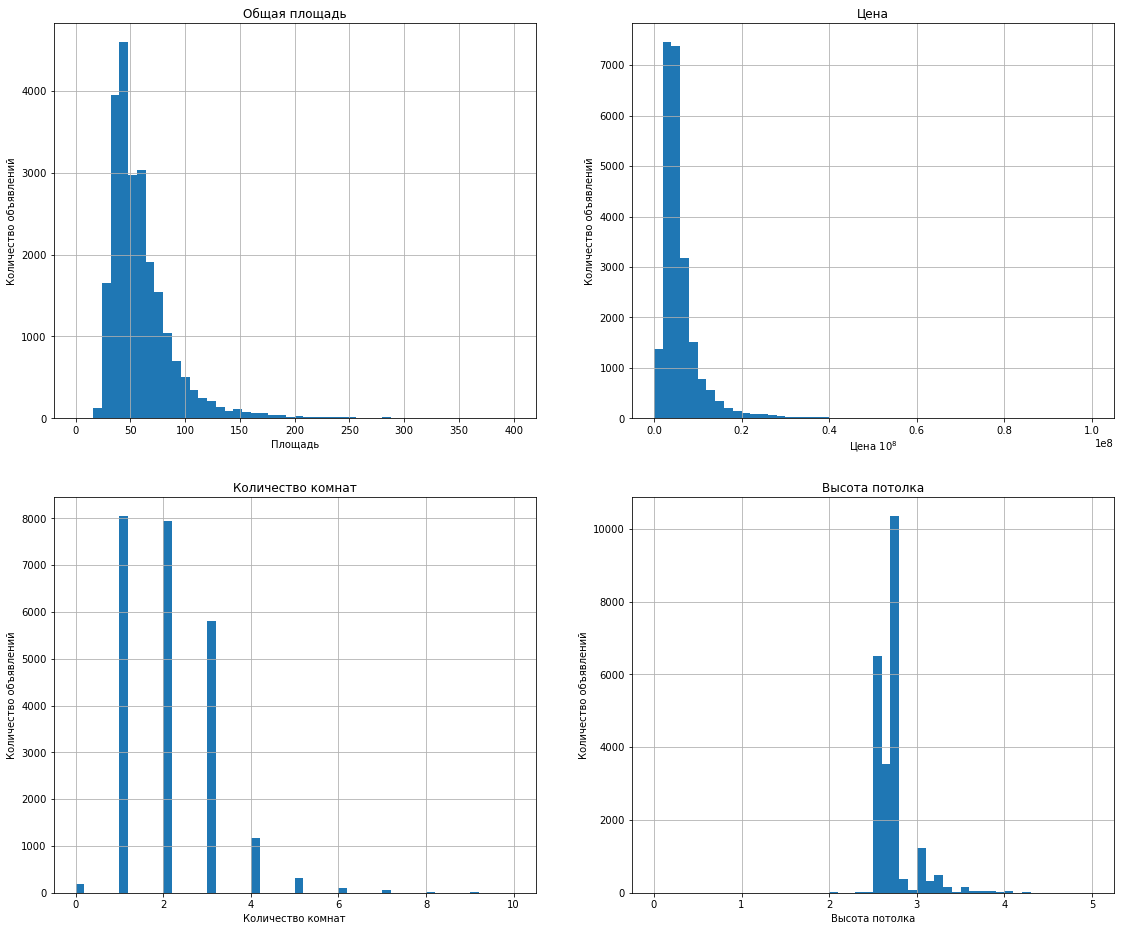

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (19,16)

plt.subplot(221)
df['total_area'].hist(bins = 50,range=(0,400))
plt.title('Общая площадь')
plt.xlabel('Площадь')
plt.ylabel('Количество объявлений')

plt.subplot(222)
df['last_price'].hist(bins=50,range=(0,100000000))
plt.title('Цена')
plt.xlabel('Цена $10^8$')
plt.ylabel('Количество объявлений')

plt.subplot(223)
df['rooms'].hist(bins=50,range=(0,10))
plt.title('Количество комнат')
plt.ylabel('Количество объявлений')
plt.xlabel('Количество комнат')

plt.subplot(224)
df['ceiling_height'].hist(bins=50,range=(0,5))
plt.title('Высота потолка')
plt.ylabel('Количество объявлений')
plt.xlabel('Высота потолка')

plt.show()

Получается, что средняя площадь продаваемой квартиры около 50 кв.м. Средняя цена - 4.65 млн.руб. Большинство продаваемых квартир - однокомнатные и двухкомнатные, однако достаточно много и трехкомнатных. Средняя высота потолка - 2.65 м.

Из явных особенностей можно выделить то, что есть продаваемые квартиры с 0 комнат и по подозрительно низкой цене. Выясним сколько объявлений с таким количеством комнат и какова минимальная цена объявления.

In [12]:
num_of_zero_rooms = df.query('rooms == 0').shape[0]
#Выяснили, что бесплатных квартир нет
# num_of_zero_price = df.query('last_price == 0').shape[0]
# print(num_of_zero_price)

print('Количество объявлений с количеством комнат равным нулю: ' + str(num_of_zero_rooms))
print('Самая дешевая квартира: ' + str(min(df['last_price'])) + ' руб.')
#Распечатаем первые пять самых дешевых объявлений
print(df['last_price'].sort_values().head())
print(df.query('last_price < 500000')['locality_name'])

Количество объявлений с количеством комнат равным нулю: 197
Самая дешевая квартира: 12190.0 руб.
8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
17676    450000.0
Name: last_price, dtype: float64
5698     городской посёлок Будогощь
6859             деревня Старополье
8793                Санкт-Петербург
9581             деревня Старополье
10782                        Сланцы
14911         посёлок станции Свирь
16032                        Сланцы
16219          деревня Вахнова Кара
16274            деревня Старополье
17456                        Сланцы
17676             деревня Ям-Тесово
18867              деревня Выскатка
21912             поселок Совхозный
23484                        Сланцы
Name: locality_name, dtype: object


Оказалось, что присутствует только 1 объявление с неправдоподобно дешевой ценой квартиры. Также посмотрев минимльные цены на жилье в Санкт-Петербурге, становятся подозрительными объявления о продаже квартир там за менее, чем 500000 руб.

Проанализируем время продажи квартиры. Построим гистограмму, рассчитаем среднее и медиану и постараемся корректно определить сколько дней считать слишком быстрой продажей, а сколько - слишком долгой.

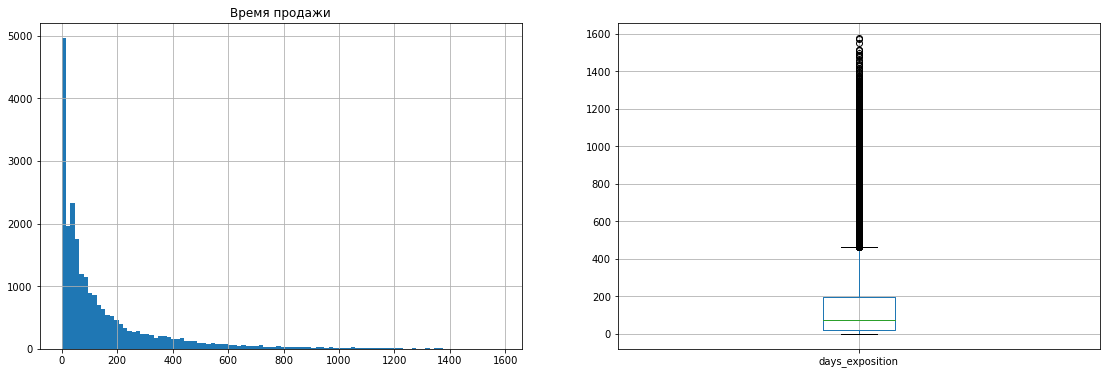

Объявлений, которые висят более 400 дней: 2637
Объявлений, которые висели менее 2х недель: 4809


count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [13]:
#Изменим размер графиков
plt.rcParams['figure.figsize'] = (19,6)

plt.subplot(121)
df['days_exposition'].hist(bins=100)
plt.title('Время продажи')

plt.subplot(122)
df['days_exposition'].to_frame().boxplot()

plt.show()

#Сколько объявлений , которые висят более 400 дней
print('Объявлений, которые висят более 400 дней: ' + str(df.query('days_exposition > 400').shape[0]))
print('Объявлений, которые висели менее 2х недель: ' + str(df.query('days_exposition < 14').shape[0]))
df['days_exposition'].describe()

В первую очередь видно как среднее и медиана сильно различаются. Из-за этого может показаться, что в выборке есть выбросы, однако, можно предполагать, что тут это объясняется в первую очередь степенью доступности жилья и потому определенные объявления кажутся выбросами.

Судя по диаграмме размаха верхней границей должно быть число чуть больше 400 дней, однако видим, что за ее пределами выпадает очень много объявлений. Так много, что они сливаются в линию (если быть точнее, то их 2637). Следовательно, мы не можем принять данное число за границу и приходится прибегнуть к логике. Примем границу в 1000 дней; это примерно 3 года. 

Теперь определимся с нижней границей. Посидев на форуме риелторов, было определено, что самая быстрая продажа квартиры была за 2 недели. Объявлений с подобной скоростью продажи и ниже в нашей выборке - 1628.

Избавимся от выбросов и пересчитаем все средние значения после этого.

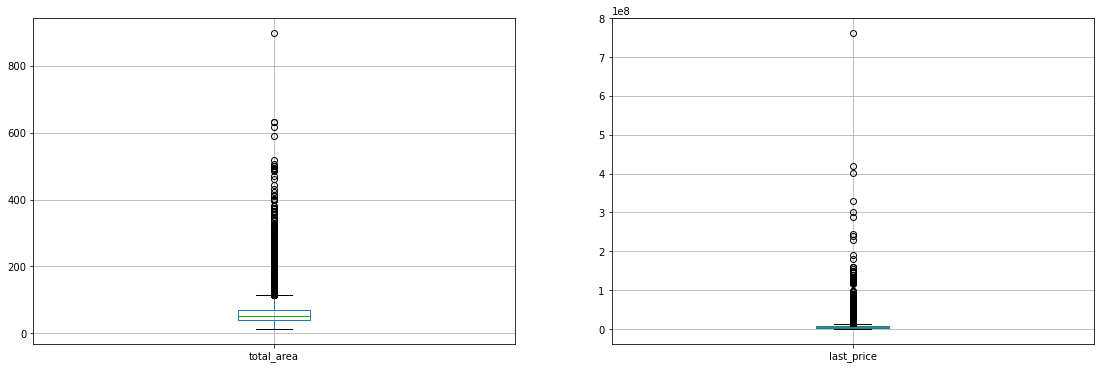

In [14]:
#Определим верхнюю границу цены и общей площади, чтобы избавиться от выбросов
plt.subplot(121)
df['total_area'].to_frame().boxplot(figsize=(9,6))

plt.subplot(122)
df['last_price'].to_frame().boxplot(figsize=(9,6))

plt.show()

In [15]:
good_df = df.query('rooms > 0 and last_price > 400000 and 14 <= days_exposition < 1000 and total_area < 580 and last_price < 400000000')
#Посмотрим сколько записей осталось
print('Осталось объявлений: ' + str(good_df.shape[0]))

good_df['days_exposition'].describe()
# good_df['last_price'].describe()
# good_df['total_area'].describe()

Осталось объявлений: 18451


count    18451.000000
mean       181.771557
std        189.274793
min         14.000000
25%         50.000000
50%        108.000000
75%        242.000000
max        999.000000
Name: days_exposition, dtype: float64

Посе фильтрации гистограммы в принципе не изменились. Разве что медианная цена квартиры немного увеличилась, но незначительно. Также не изменились средние показатели столбца days_exposition.

Теперь займемся анализом того, как количество квадратных метров, число комнат и удаленность от центар влияют на цену квартиры.

In [16]:
#Исследуем как влияет число комнат
pd.options.display.float_format = '{:,.1f}'.format
rooms_research = good_df.pivot_table(index='rooms',values='last_price',aggfunc='median')
print(rooms_research)

        last_price
rooms             
1      3,550,000.0
2      4,700,000.0
3      6,099,500.0
4      8,900,000.0
5     13,000,000.0
6     19,500,000.0
7     23,000,000.0
8     23,095,000.0
9     24,250,000.0
10    40,000,000.0
11    33,000,000.0
14    26,829,500.0
19    32,250,000.0


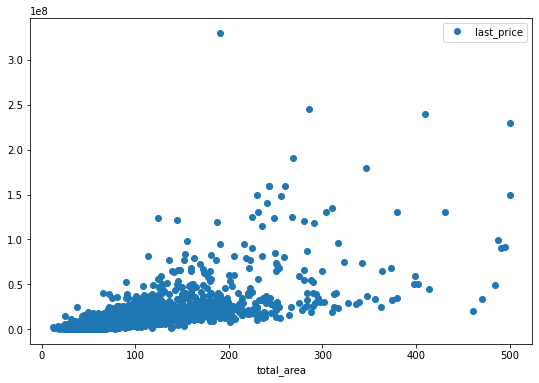

In [17]:
#Исследование зависимости цены от общей площади
plt.rcParams['figure.figsize'] = (9,6)
total_area_research = good_df[['total_area','last_price']].sort_values(by='total_area')
total_area_research.plot(x='total_area',y='last_price',style='o')
plt.show()

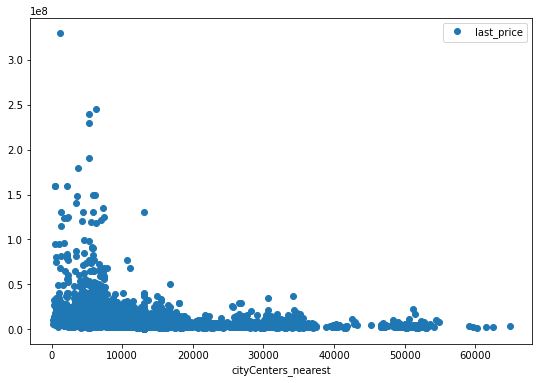

In [18]:
#Исследуем зависимость удаленности от центра на цену
cityCenters_research = good_df[['cityCenters_nearest','last_price']].sort_values(by='cityCenters_nearest')
cityCenters_research.plot(x='cityCenters_nearest',y='last_price',style='o')
plt.show()

In [19]:
#Исследуем зависимость цены от этажа
floor_research = good_df.pivot_table(index='floor_category',values='last_price',aggfunc='median')
print(floor_research)

                last_price
floor_category            
Другой         4,720,000.0
Первый         3,800,000.0
Последний      4,285,000.0


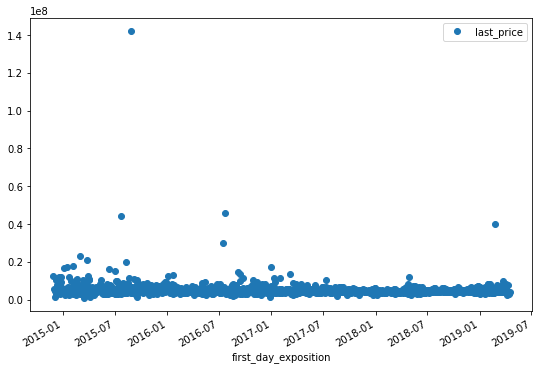

In [20]:
#Исследуем зависимость от даты размещения
date_research = good_df.sort_values(by='first_day_exposition').pivot_table(index='first_day_exposition',values='last_price',aggfunc='median')
date_research.plot(y='last_price',style='o')
plt.show()

In [21]:
good_df[['rooms','last_price','total_area','cityCenters_nearest','floor_category']].corr()

,rooms,last_price,total_area,cityCenters_nearest
rooms,1.0,0.4,0.8,-0.2
last_price,0.4,1.0,0.7,-0.2
total_area,0.8,0.7,1.0,-0.2
cityCenters_nearest,-0.2,-0.2,-0.2,1.0


Больше комнат - больше цена, но неоднозначно (0.5)

Больше комнат - больше площадь. Сильная зависимость (0.77)

Особой связи между количеством комнат и удаленности от центра нет

Значительна связь между ценой и общей площадью

Связь между ценой и удаленностью от центра обратная, однако слабая. То же самое можно сказать и про площадь-удаленность от центра.

In [22]:
#День недели
weekday_research = good_df.pivot_table(index='weekday_of_publish',values='last_price',aggfunc='median')
weekday_research

,last_price
weekday_of_publish,
Friday,"4,500,000.0"
Monday,"4,500,000.0"
Saturday,"4,500,000.0"
Sunday,"4,450,000.0"
Thursday,"4,600,000.0"
Tuesday,"4,640,000.0"
Wednesday,"4,558,637.0"


In [23]:
#Месяц
month_research = good_df.pivot_table(index='month_of_publish',values='last_price',aggfunc='median')
month_research

,last_price
month_of_publish,
April,"4,550,000.0"
August,"4,500,000.0"
December,"4,550,000.0"
February,"4,550,000.0"
January,"4,500,000.0"
July,"4,600,000.0"
June,"4,400,000.0"
March,"4,500,000.0"
May,"4,500,000.0"


In [24]:
#Год
year_research = good_df.pivot_table(index='year_of_publish',values='last_price',aggfunc='median')
year_research

,last_price
year_of_publish,
2014,"7,100,000.0"
2015,"5,100,000.0"
2016,"4,500,000.0"
2017,"4,500,000.0"
2018,"4,500,000.0"
2019,"4,850,000.0"


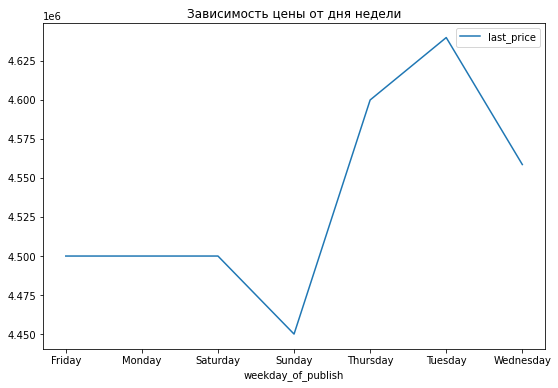

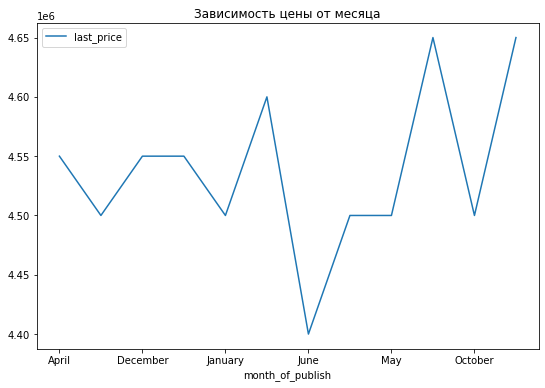

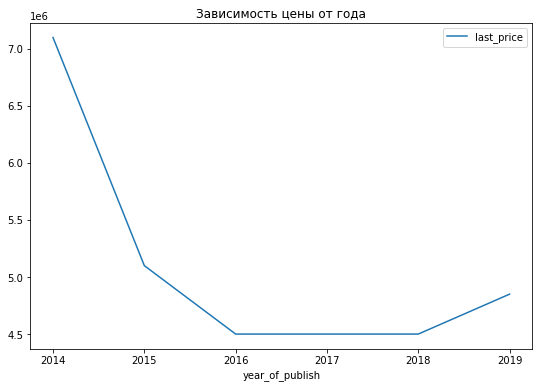

In [25]:
#Построим графики по дню недели, месяцу и году
weekday_research.plot(y='last_price',title = 'Зависимость цены от дня недели',figsize=(9,6))
plt.show()

month_research.plot(y='last_price',title = 'Зависимость цены от месяца',figsize=(9,6))
plt.show()

year_research.plot(y='last_price',title = 'Зависимость цены от года',figsize=(9,6))
plt.show()

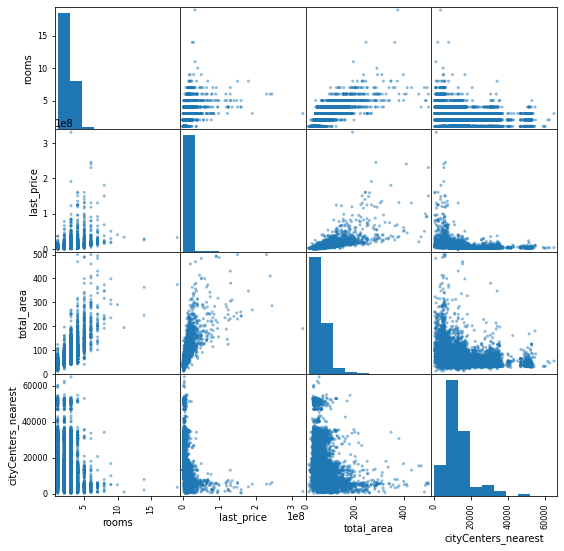

In [26]:
#Построим диаграммы рассеяния попарно для всех исследуемых параметров
scat_matrix = good_df[['rooms','last_price','total_area','cityCenters_nearest','floor_category']]
pd.plotting.scatter_matrix(scat_matrix, figsize=(9, 9))
plt.show()

Чем больше комнат в квартире - тем больше цена, ничего удивительного. Хотя диаграмма рассеяния показала еще, что в какой-то момент (примерно 7) цена начинает снова падать, несмотря на увеличение комнат.

С увеличением общей площади цена растет, хотя тут не все так однозначно. Этот рост достаточно устойчивый до 200 кв.м, но затем начинается сильный разброс. Хотя и на всем пути встречаются случаи того, что площадь может быть значительно меньше, а цена такая же как и у квартиры с большйо площадью. Скорее всего это связано с другими факторами, например, удаленность от центра. Вполне вероятно, что квартира, находящаяся в центре, с небольшой площадью будет стоить как и загородная с площадью на порядок больше. Интересно таакже заметить, что на диаграмме рассеяния общая площадь уменьшается с удалением от центра.

Видна явная закономерность между удаенностью от центра и ценой. В центре цены больше и к тому же объявлений о продаже квартир становится все меньше и меньше с удалением от центра.

Квартиры на первом этаже в среднем стоят меньше, чем квартиры на последнем (причем на целый миллион!). Вообще на последнем этаже квартиры стоят дороже, чем на любом другом.

Особой зависимости от даты размещений объявления не обнаружено. Есть пару выбросов, но они не похожи на закономерность.

В среднем объявление на продажу лучше выставлять во вторник. В воскресенье цена самая маленькая: возможно это связано с тем, что в воскресенье люди отдыхают и более расслаблены и потому легче совершают подобные сделки.

Месяцы весны и лета кажутся наиболее выгодны, хотя есть и месяцы осени, где цены тоже высоки, потому сделать определенный вывод не получается.

В 2014 году цены были намного выше, чем у других годов и видно как из года в год цены сначала падали, а потом снова наали подниматься. 

Теперь займемся определением населенного пункта с самым дорогим и самым дешевым жильем.

In [27]:
locality_stat = good_df.pivot_table(index='locality_name',values='price_per_square_m',aggfunc=['median','count'])
locality_stat.columns = ['Price per square m','Number of ads']
#Распечатаем первые десять населенных пунктов с самым дорогим квадратным метром
locality_stat.sort_values(by='Price per square m',ascending=False).head(5)

,Price per square m,Number of ads
locality_name,,
посёлок Лисий Нос,"168,706.7",1
Зеленогорск,"103,995.7",20
Санкт-Петербург,"102,941.2",12174
Сестрорецк,"98,672.7",154
Пушкин,"97,988.7",274


In [28]:
#Распечатаем первые десять населенных пунктов с самым большим количеством объявлений
locality_stat.sort_values(by='Number of ads',ascending=False).head(10)

,Price per square m,Number of ads
locality_name,,
Санкт-Петербург,"102,941.2",12174
посёлок Мурино,"85,582.3",441
посёлок Шушары,"75,837.7",368
Всеволожск,"65,811.4",316
Колпино,"73,378.8",279
Пушкин,"97,988.7",274
посёлок Парголово,"91,328.4",269
деревня Кудрово,"91,763.6",252
Гатчина,"66,666.7",245


In [29]:
#Найдем населенный пункт с самой дешевой ценой за квартиру
locality_stat.sort_values(by='Price per square m',ascending=False).tail(25)

,Price per square m,Number of ads
locality_name,,
поселок Оредеж,"20,936.6",2
посёлок Плоское,"20,912.5",1
деревня Кисельня,"20,909.1",1
поселок Торковичи,"20,458.9",3
поселок городского типа Лесогорский,"19,833.3",3
Пикалёво,"19,251.6",16
поселок Цвылёво,"19,117.7",1
Сланцы,"18,597.0",90
деревня Пельгора,"18,269.2",1


Населенные пункты с самым большим количеством объявлений: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина, деревня Кудрово, Выборг.

Населенные пункты с самой большой ценой за кв.м: Санкт-Петербург, Зеленогорск, Пушкин, Сестрорецк.

Населенный пункт с самой дешевой ценой за кв.м. примем Сланец, хоть он и не на последнем месте, но по нему объявлений значительно больше, а значит и оценка более устойчива.

Посчитаем цену для каждого километра от центра в городе Санкт-Петербург

<ipython-input-30-92901e823446>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Peterburg_ads['city_center_km'] = round(Peterburg_ads['cityCenters_nearest'] / 1000)


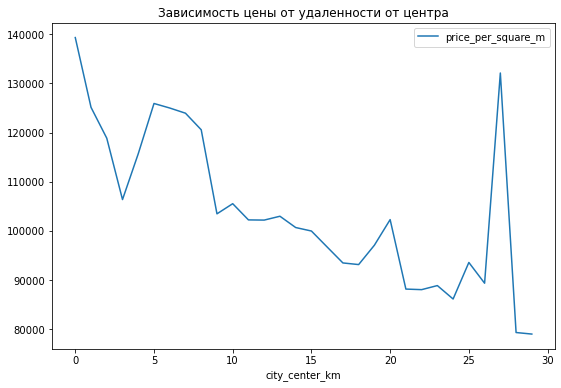

In [30]:
#Выделим только объявления в Санкт-Петербурге
Peterburg_ads = good_df.query('locality_name == "Санкт-Петербург"')
#Создаем столбец с удаленностью от центра в километрах
Peterburg_ads['city_center_km'] = round(Peterburg_ads['cityCenters_nearest'] / 1000)
price_per_km = Peterburg_ads.pivot_table(index='city_center_km',values='price_per_square_m',aggfunc='median')
price_per_km.plot(y='price_per_square_m',title = 'Зависимость цены от удаленности от центра',figsize=(9,6))
plt.show()

Центральной зоной выделим 9 км. 

In [36]:
#Выберем объявления, находящиеся в центре
center_ads = Peterburg_ads.query('city_center_km < 10')

#Исследуем влияние этажа на цену за кв.м.
center_ads.pivot_table(index='floor_category',values='price_per_square_m',aggfunc='median')

,price_per_square_m
floor_category,
Другой,"121,349.8"
Первый,"103,225.8"
Последний,"113,053.7"


In [38]:
#Исследуем влияние этажа на цену
center_ads.pivot_table(index='floor_category',values='last_price',aggfunc='median')

,last_price
floor_category,
Другой,"8,500,000.0"
Первый,"5,950,000.0"
Последний,"8,300,000.0"


In [39]:
#Исследуем влияние числа комнат на цену за кв.м.
center_ads.pivot_table(index='rooms',values='price_per_square_m',aggfunc='median')

,price_per_square_m
rooms,
1,"130,790.5"
2,"118,830.0"
3,"110,987.0"
4,"108,396.9"
5,"100,247.4"
6,"104,248.3"
7,"108,827.1"
8,"94,626.7"
9,"85,793.8"


In [40]:
#Исследуем влияние числа комнат на цену
center_ads.pivot_table(index='rooms',values='last_price',aggfunc='median')

,last_price
rooms,
1,"5,250,000.0"
2,"6,950,000.0"
3,"9,400,000.0"
4,"11,750,000.0"
5,"14,200,000.0"
6,"19,500,000.0"
7,"23,000,000.0"
8,"22,190,000.0"
9,"23,000,000.0"


In [41]:
#Исследуем влияние месяца размещения на цену за кв.м.
center_ads.pivot_table(index='month_of_publish',values='price_per_square_m',aggfunc='median')

,price_per_square_m
month_of_publish,
April,"112,307.7"
August,"122,727.3"
December,"114,736.8"
February,"113,930.7"
January,"117,244.9"
July,"118,236.6"
June,"115,058.9"
March,"126,690.0"
May,"122,580.6"


In [42]:
#Исследуем влияние месяца размещения на цену
center_ads.pivot_table(index='month_of_publish',values='last_price',aggfunc='median')

,last_price
month_of_publish,
April,"7,600,000.0"
August,"8,000,000.0"
December,"7,400,000.0"
February,"8,050,000.0"
January,"7,900,000.0"
July,"8,375,000.0"
June,"8,138,000.0"
March,"8,100,000.0"
May,"8,100,000.0"


In [43]:
#Исследуем влияние года размещения на цену за кв.м.
center_ads.pivot_table(index='year_of_publish',values='price_per_square_m',aggfunc='median')

,price_per_square_m
year_of_publish,
2014,"131,475.0"
2015,"112,878.8"
2016,"115,000.0"
2017,"116,257.2"
2018,"118,666.7"
2019,"128,125.0"


In [44]:
#Исследуем влияние года размещения на цену
center_ads.pivot_table(index='year_of_publish',values='last_price',aggfunc='median')

,last_price
year_of_publish,
2014,"11,100,000.0"
2015,"8,500,000.0"
2016,"8,750,000.0"
2017,"8,200,000.0"
2018,"7,900,000.0"
2019,"7,700,000.0"


In [45]:
#Исследуем влияние удаленности от центра на цену кв.м.
center_ads.pivot_table(index='city_center_km',values='price_per_square_m',aggfunc='median')

,price_per_square_m
city_center_km,
0.0,"139,318.9"
1.0,"125,135.7"
2.0,"118,867.9"
3.0,"106,394.6"
4.0,"115,705.8"
5.0,"125,920.6"
6.0,"125,000.0"
7.0,"123,945.0"
8.0,"120,576.7"


In [46]:
#Исследуем влияние удаленности от центра на цену
center_ads.pivot_table(index='city_center_km',values='last_price',aggfunc='median')

,last_price
city_center_km,
0.0,"11,500,000.0"
1.0,"11,050,000.0"
2.0,"9,500,000.0"
3.0,"8,000,000.0"
4.0,"8,750,000.0"
5.0,"9,086,000.0"
6.0,"8,500,000.0"
7.0,"7,500,000.0"
8.0,"7,000,000.0"


In [32]:
#Теперь повторим вычисления, но для всего города
#Исследуем влияние этажа на цену
print(Peterburg_ads.pivot_table(index='floor_category',values='price_per_square_m',aggfunc='median'))
print()
print(Peterburg_ads.pivot_table(index='floor_category',values='last_price',aggfunc='median'))
print()

#Исследуем влияние числа комнат на цену
print(Peterburg_ads.pivot_table(index='rooms',values='price_per_square_m',aggfunc='median'))
print()
print(Peterburg_ads.pivot_table(index='rooms',values='last_price',aggfunc='median'))
print()

#Исследуем влияние даты размещения на цену
print('Месяц от цены за кв.м.')
print(Peterburg_ads.pivot_table(index='month_of_publish',values='price_per_square_m',aggfunc='median'))
print()
print('Месяц от цены')
print(Peterburg_ads.pivot_table(index='month_of_publish',values='last_price',aggfunc='median'))
print()
print('Год от цены за кв.м.')
print(Peterburg_ads.pivot_table(index='year_of_publish',values='price_per_square_m',aggfunc='median'))
print()
print('Год от цены')
print(Peterburg_ads.pivot_table(index='year_of_publish',values='last_price',aggfunc='median'))
print()

#Исследуем влияние удаленности от центра на цену
print('Удаленность на цену за кв.м.')
print(Peterburg_ads.pivot_table(index='city_center_km',values='price_per_square_m',aggfunc='median'))
print()
print('Удаленность на цену')
print(Peterburg_ads.pivot_table(index='city_center_km',values='last_price',aggfunc='median'))
print()

                price_per_square_m
floor_category                    
Другой                   104,965.5
Первый                    92,003.1
Последний                100,000.0

                last_price
floor_category            
Другой         5,500,000.0
Первый         4,650,000.0
Последний      5,500,000.0

       price_per_square_m
rooms                    
1               109,404.8
2               101,923.1
3                95,704.3
4                96,666.7
5                98,685.8
6               100,529.1
7               109,996.1
8                94,626.7
9                85,793.8
10              137,931.0
11              170,015.5
14               92,827.7
19               86,091.8

        last_price
rooms             
1      4,000,000.0
2      5,500,000.0
3      6,992,500.0
4      9,850,000.0
5     13,950,000.0
6     19,500,000.0
7     23,950,000.0
8     22,190,000.0
9     24,250,000.0
10    40,000,000.0
11    33,000,000.0
14    26,829,500.0
19    32,250,000.0

Месяц от це

Проведем небольшой анализ по изученным параметрам.

В центре цены на квартиры на последнем этаже уже меньше, чем во всем городе и по всем объявлениям. Значит людей интересует красивый вид только в случае удаления от центра города.

С количеством комнат все не так однозначно. Было выяснено еще с диаграммы рассеяния, что по мере удаления от центра многокомнатных квартир становится все больше и больше, а в центре больше 1-2х-комнатных. Отсюда и цена за квадратный метр уменьшается с увеличением количества комнат, хотя и средние цены на квартиры с увеличением количества комнат растут.

В зависимости от месяца выкладывания объявления цены по всему городу не сильно отличаются, однако при рассмотрении именно центра - наиболее выгодными месяцами для продажи являются поздняя весна, лето и ранняя осень.

В зависимости от года данные как для всего города, так и для центра не отличаются: с 2014 года уменьшение и затем плавный рост.

Удаленность от центра также не изменилась для двух выборок.

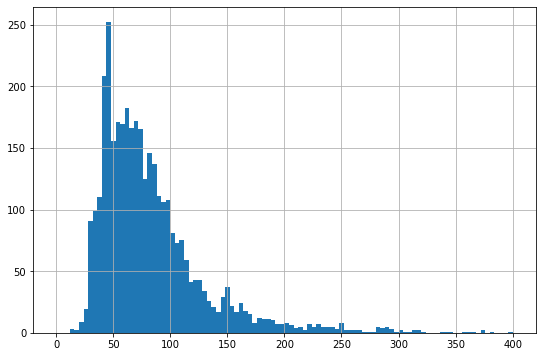

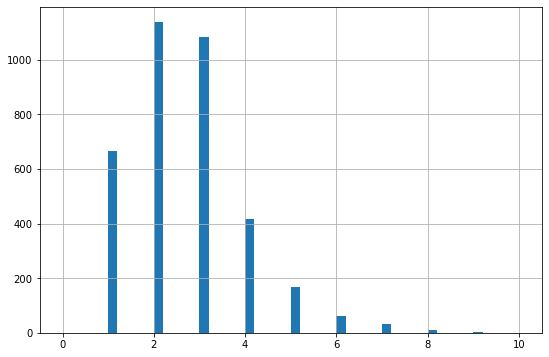

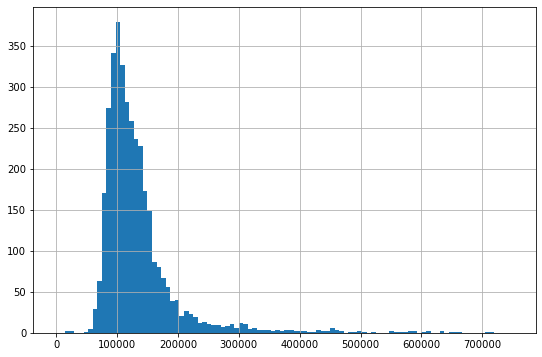

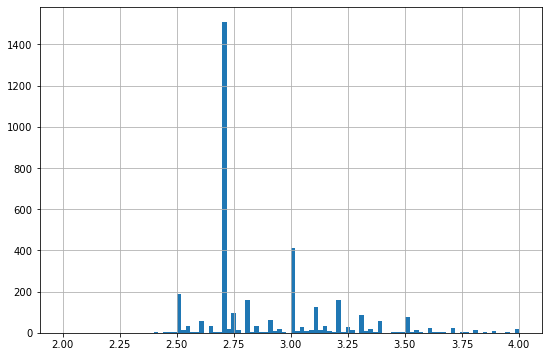

In [33]:
research_params = center_ads[['total_area','rooms','price_per_square_m','ceiling_height']]
research_params['total_area'].hist(bins=100,range=(0,400),figsize=(9,6))
plt.show()
research_params['rooms'].hist(bins=50,range=(0,10),figsize=(9,6))
plt.show()
research_params['price_per_square_m'].hist(bins=100,range=(0,750000),figsize=(9,6))
plt.show()
research_params['ceiling_height'].hist(bins=100,range=(2,4),figsize=(9,6))
plt.show()

Из явных особенностей можно выделить лишь то, что в центре значительно меньше однокомнатных квартир, по сравнению со всем датафреймом.

### Шаг 5. Общий вывод

В центре люди меньше предпочитают квартиры на последнем этаже и потому цены больше в категории "Другие".

В среднем цена на квартиры с увеличением количества комнат растет, однако присутствует много случаев, когда комнат значительно меньше, а квартира стоит дороже или примерно столько же. Это связано в первую очередь с удаленностью от центра. Там квартиры значительно дороже и в основном комнат мало по сравнению с теми, что за центром. Потому и показано как цена за квадратный метр стремительно падает с удалением от центра.

Были выделены населенные пункты с самым большим количеством объявлений, с самой дорогой ценой и с самой маленькой ценой за квадратный метр.

Виден устойчивый рост цены с увеличением площади квартиры до определенного момента (200 кв.м.) и затем значительный разброс. 

Также были определены границы в продолжительности продажи квартиры: до 2х недель считается очень быстрая продажа и более 3х лет считается слишком долгой, хотя я видел на форумах как человек жаловался, что не может продать квартиру 6 лет. 

В среднем объявление лучше выкладывать в середине недели, так как в эти дни цена продаж выше по сравнению с выходными, вероятно по причине того, что в воскресенье люди теряют небходимую хватку и соглашаются на меньшее.

Продавать также стоит ближе к лету. 

Видно падение средней цены на квартиру с 2014 года, однако заметно и восстановление к 2019 году, хотя, конечно же, еще не полное.